# EuroSAT Classification — Train classifier

This notebook trains a **ResNet18 model** or **Simple CNN** on the **EuroSAT Dataset** using the dataloader and training functions from *./src*.

### 1. Setup environment and imports

In [28]:
import sys, os
if not hasattr(sys, "frozen"):
    os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"
import torch
from torchvision import models
import torch.nn as nn

sys.path.append(os.path.abspath("..")) 
from src.training.train import train_model
from src.training.evaluate import evaluate_model, plot_confusion_matrix



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model_name = "resnet18" # simplecnn
data_dir = '../data/raw'
checkpoint_dir = '../experiments/checkpoints'

Using device: cpu


In [29]:
epochs = 100
early_stopping = 10

if model_name == "simplecnn":
        checkpoint_path = "../experiments/checkpoints/simplecnn_best.pth"
elif model_name == "resnet18":
        checkpoint_path = "../experiments/checkpoints/resnet18_best.pth"
        


### 2. Train baseline SimpleCNN / ResNet18 model

In [30]:
model, classes = train_model(
    data_dir=data_dir,
    batch_size=64,
    epochs=epochs,
    lr=1e-4,
    model_name=model_name, 
    output_dir=checkpoint_dir,
    early_stopping_patience=early_stopping,
)

print(f"\nTraining completed. Number of classes: {len(classes)}")

🔧 Using device: cpu

📘 Epoch 1/100


Train Loss: 0.1755 | Train Acc: 93.81%
Val Loss:   0.0401 | Val Acc:   98.52%
✅ New best model saved (98.52%)

📘 Epoch 2/100


Train Loss: 0.0233 | Train Acc: 99.38%
Val Loss:   0.0354 | Val Acc:   98.67%
✅ New best model saved (98.67%)

📘 Epoch 3/100


Train Loss: 0.0102 | Train Acc: 99.76%
Val Loss:   0.0367 | Val Acc:   98.89%
✅ New best model saved (98.89%)

📘 Epoch 4/100


Train Loss: 0.0138 | Train Acc: 99.56%
Val Loss:   0.0326 | Val Acc:   98.59%

📘 Epoch 5/100


Train Loss: 0.0084 | Train Acc: 99.79%
Val Loss:   0.0480 | Val Acc:   98.59%

📘 Epoch 6/100


Train Loss: 0.0042 | Train Acc: 99.87%
Val Loss:   0.0374 | Val Acc:   98.81%

📘 Epoch 7/100


Train Loss: 0.0047 | Train Acc: 99.87%
Val Loss:   0.0405 | Val Acc:   98.81%

📘 Epoch 8/100


Train Loss: 0.0058 | Train Acc: 99.84%
Val Loss:   0.0271 | Val Acc:   99.19%
✅ New best model saved (99.19%)

📘 Epoch 9/100


Train Loss: 0.0035 | Train Acc: 99.90%
Val Loss:   0.0334 | Val Acc:   99.11%

📘 Epoch 10/100


Train Loss: 0.0077 | Train Acc: 99.79%
Val Loss:   0.0574 | Val Acc:   98.15%

📘 Epoch 11/100


Train Loss: 0.0063 | Train Acc: 99.79%
Val Loss:   0.0647 | Val Acc:   98.74%

📘 Epoch 12/100


Train Loss: 0.0094 | Train Acc: 99.71%
Val Loss:   0.0337 | Val Acc:   98.96%

📘 Epoch 13/100


Train Loss: 0.0026 | Train Acc: 99.92%
Val Loss:   0.0624 | Val Acc:   98.22%

📘 Epoch 14/100


Train Loss: 0.0092 | Train Acc: 99.73%
Val Loss:   0.0366 | Val Acc:   99.04%

📘 Epoch 15/100


Train Loss: 0.0144 | Train Acc: 99.75%
Val Loss:   0.0590 | Val Acc:   98.07%

📘 Epoch 16/100


Train Loss: 0.0101 | Train Acc: 99.70%
Val Loss:   0.0383 | Val Acc:   98.74%

📘 Epoch 17/100


Train Loss: 0.0064 | Train Acc: 99.84%
Val Loss:   0.0334 | Val Acc:   99.04%

📘 Epoch 18/100


Train Loss: 0.0028 | Train Acc: 99.92%
Val Loss:   0.0323 | Val Acc:   98.81%
⏹️ Early stopping triggered.

Evaluating best model on test set...


🎯 Test Accuracy: 99.48%

Training completed. Number of classes: 3


### 3. Evaluate final metrics on Test Dataset

In [31]:
metrics = evaluate_model(
    model_path=checkpoint_path,
    data_dir=data_dir,
    batch_size=64,
    model_name=model_name,
    device=device
)

- Metrics

In [32]:
print(f"Test Accuracy: {metrics['accuracy']*100:.2f}%")
print(f"Test Loss: {metrics['loss']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-score: {metrics['f1']:.4f}")

print("\nClassification metrics per category:\n\n", metrics["classification_report"])


Test Accuracy: 99.41%
Test Loss: 0.0140
Precision: 0.9941
Recall: 0.9939
F1-score: 0.9940

Classification metrics per category:

               precision    recall  f1-score   support

      Forest     0.9953    0.9861    0.9907       431
 Residential     0.9955    0.9978    0.9966       446
     SeaLake     0.9916    0.9979    0.9947       473

    accuracy                         0.9941      1350
   macro avg     0.9941    0.9939    0.9940      1350
weighted avg     0.9941    0.9941    0.9941      1350



- Confusion Matrix

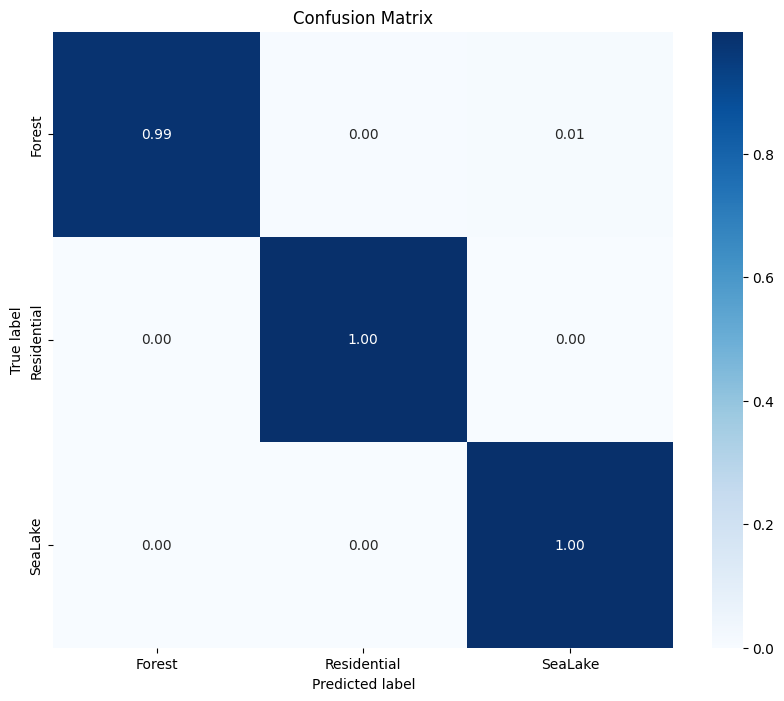

In [33]:
plot_confusion_matrix(metrics["confusion_matrix"], metrics["class_names"])